<a href="https://colab.research.google.com/github/joseorlandomx/topicodeindustria1/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final (Dashboard tema libre)**

José Orlando Salas Contreras (208743738)

[jose.salas4373@alumnos.udg.mx](mailto:jose.salas4373@alumnos.udg.mx)

Verónica Marisela Frías Peralta (208561486)

[veronica.frias6148@alumnos.udg.mx](mailto:veronica.frias6148@alumnos.udg.mx)

**Requisitos mínimos:**
* **Capa 1**: Un panel de controles que permita generar el **dataset origen** a analizar. Este dataset puede ser generado al momento partiendo de una formula e introduciendo los parametros a travez de los widgets en el panel (**ejemplo**: selección del tipo de trayectoria y sus parámetros en la práctica 4), o puede ser el resultado de filtrar un dataset mayor ya existente en memoria, en cuyo caso los widgets en el panel de control permitiran ajustar los limites de dichos filtros.
* **Capa 2**: Un panel en el cual se despliegue una **representación gráfica del dataset origen** (**ejemplo**: Trazo de la trayectoria en 3D en la práctica 4).
* **Capa 3**: Un panel de controles que permita elegir entre diferentes **metricas** a calcular a partir del dataset origen. Las métricas obtenidas deberán ser representadas también graficamente (**ejemplo**: Selección entre path length y mean squared displacement y su gráfica en la práctica 4).

**Revisión de la práctica:**
* El notebook con la práctica se entregará en un repositorio en **GitHub**. Será necesario demostrar por medio de commits el historial de versiones de su NoteBook.
* Los integrantes del equipo deberán explicar su código y deberán ser capaces de corregir errores introducidos a este.
* Uno de los integrantes del equipo presentará el dashboard durante la clase.

## **Modules**

In [ ]:
# Importar bibliotecas necesarias
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import panel as pn
import panel.widgets as pnw
import plotly.express as px
from scipy.stats import wrapcauchy
from scipy.stats import levy_stable
from scipy.spatial import distance

# Extensión para visualización interactiva en Panel
pn.extension('plotly')

# Descomentar si se está ejecutando en Google Colab
# from google.colab import drive
# drive.mount('/content/gdrive/')

# Importar widgets de IPython
import ipywidgets as widgets

# Importar Panel nuevamente (puede haber sido importado previamente, pero está duplicado aquí)
import panel as pn
import panel.widgets as pnw

## **Capa 1**


Column
    [0] Select(name='Seleccione una c..., options={'Alimentos, bebidas y tab...}, value='TR01')
    [1] Select(name='Seleccione el n..., options={'1': 1, '2': 2, ...}, value=1)

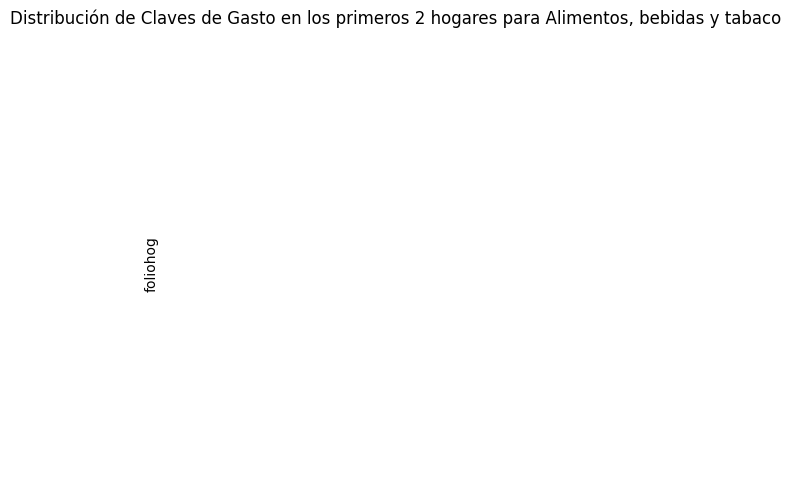

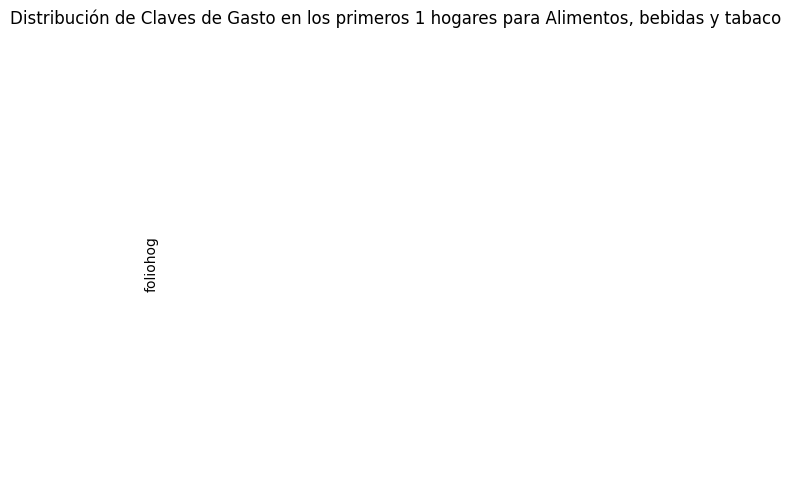

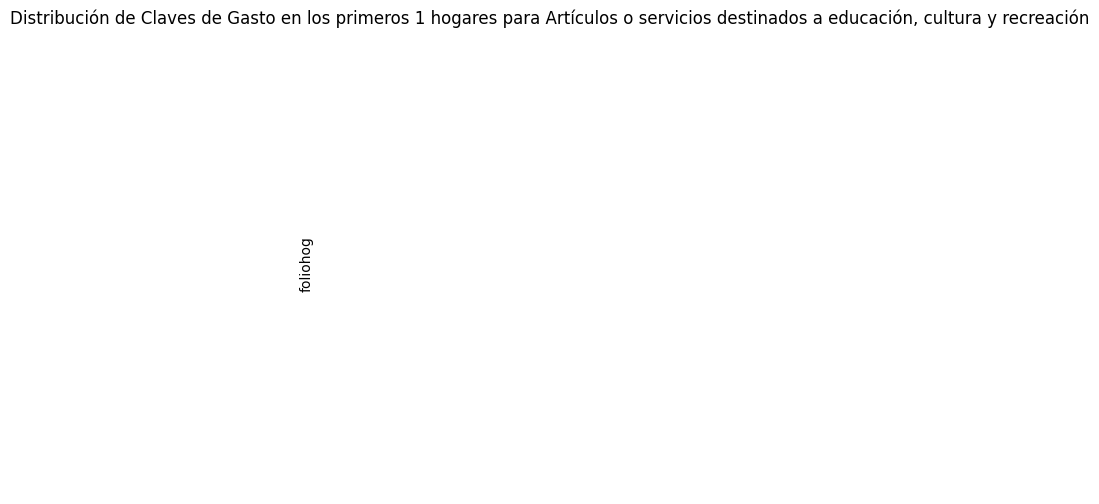

In [ ]:
# Cargar el conjunto de datos
url = '/content/conjunto_de_datos_gastotarjetas_enigh2022_ns.csv'
df = pd.read_csv(url)

# Definir las opciones para las categorías de gastos
categorias = {
    'TB01': 'Alimentos, bebidas y tabaco',
    'TB02': 'Artículos o servicios destinados a la limpieza y cuidados de la casa',
    'TB03': 'Artículos o servicios destinados a cuidados personales',
    'TB04': 'Artículos o servicios destinados a educación, cultura y recreación',
    'TB05': 'Artículos o servicios destinados a la comunicación y servicios para vehículos',
    'TB06': 'Artículos o servicios destinados a vivienda y servicios de conservación',
    'TB07': 'Último recibo pagado',
    'TB08': 'Prendas de vestir, calzado y accesorios',
    'TB09': 'Cristalería, blancos y utensilios domésticos',
    'TB10': 'Artículos o servicios destinados a cuidados de la salud',
    'TB11': 'Enseres domésticos y mantenimiento de la vivienda',
    'TB12': 'Artículos de esparcimiento',
    'TB13': 'Artículos o servicios destinados al transporte',
    'TB14': 'Gastos diversos',
    'TB15': 'Erogaciones financieras y de capital',
    'TR01': 'Alimentos, bebidas y tabaco',
    'TR02': 'Artículos o servicios destinados a la limpieza y cuidados de la casa',
    'TR03': 'Artículos o servicios destinados a cuidados personales',
    'TR04': 'Artículos o servicios destinados a educación, cultura y recreación',
    'TR05': 'Artículos o servicios destinados a la comunicación y servicios para vehículos',
    'TR06': 'Artículos o servicios destinados a vivienda y servicios de conservación',
    'TR07': 'Último recibo pagado',
    'TR08': 'Prendas de vestir, calzado y accesorios',
    'TR09': 'Cristalería, blancos y utensilios domésticos',
    'TR10': 'Artículos o servicios destinados a cuidados de la salud',
    'TR11': 'Enseres domésticos y mantenimiento de la vivienda',
    'TR12': 'Artículos de esparcimiento',
    'TR13': 'Artículos o servicios destinados al transporte',
    'TR14': 'Gastos diversos',
    'TR15': 'Erogaciones financieras y de capital',
}

# Definir las opciones para el número de hogares
hogares = {
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
}

# Invertir las llaves y valores de las categorías de gastos
categorias_invertidas = {v: k for k, v in categorias.items()}

# Crear los menús desplegables
menu_categorias = pnw.Select(options=categorias_invertidas, name='Seleccione una categoría:')
menu_hogares = pnw.Select(options=hogares, name='Seleccione el número de hogares:')

# Definir una función para actualizar la gráfica
def actualizar_grafica(event):
    categoria_seleccionada = categorias[menu_categorias.value]
    numero_hogares = menu_hogares.value

    # Filtrar el DataFrame según la categoría y el número de hogares
    df_filtrado = df[(df['clave'] == categoria_seleccionada) & (df['foliohog'] <= numero_hogares)]

    # Crear la gráfica de pastel para la distribución total de claves por hogar
    fig, ax = plt.subplots(figsize=(8, 6))
    df_filtrado['foliohog'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)

    # Configuración del gráfico
    ax.set_title(f'Distribución de Claves de Gasto en los primeros {numero_hogares} hogares para {categoria_seleccionada}')

    # Mostrar el gráfico
    plt.show()

# Vincular la función de actualización al cambio en los menús desplegables
menu_categorias.param.watch(actualizar_grafica, 'value')
menu_hogares.param.watch(actualizar_grafica, 'value')

# Mostrar el panel con los widgets y la gráfica
pn.Column(menu_categorias, menu_hogares)






# Mostrar el gráfico
#plt.show()

#pn.Column('Renglon1', 'Renglon2', 'Renglon3')

# Definir el widget
# Integer_A = pnw.IntInput()
#Integer_A = pnw.IntInput(name='Un valor entero', value=-50, step=5, start=-100, end=100)
# Desplegar el widget
#Integer_A




In [114]:
# Importar bibliotecas necesarias
import pandas as pd
import plotly.graph_objects as go
import panel as pn
import panel.widgets as pnw

# Cargar el conjunto de datos
url = '/content/conjunto_de_datos_gastotarjetas_enigh2022_ns.csv'
df = pd.read_csv(url)

# Crear un diccionario de categorías para mapear claves a descripciones
categorias = {
    'TB01': 'Alimentos, bebidas y tabaco',
    'TB02': 'Artículos o servicios destinados a la limpieza y cuidados de la casa',
    'TB03': 'Artículos o servicios destinados a cuidados personales',
    'TB04': 'Artículos o servicios destinados a educación, cultura y recreación',
    'TB05': 'Artículos o servicios destinados a la comunicación y servicios para vehículos',
    'TB06': 'Artículos o servicios destinados a vivienda y servicios de conservación',
    'TB07': 'Último recibo pagado',
    'TB08': 'Prendas de vestir, calzado y accesorios',
    'TB09': 'Cristalería, blancos y utensilios domésticos',
    'TB10': 'Artículos o servicios destinados a cuidados de la salud',
    'TB11': 'Enseres domésticos y mantenimiento de la vivienda',
    'TB12': 'Artículos de esparcimiento',
    'TB13': 'Artículos o servicios destinados al transporte',
    'TB14': 'Gastos diversos',
    'TB15': 'Erogaciones financieras y de capital',
    'TR01': 'Alimentos, bebidas y tabaco',
    'TR02': 'Artículos o servicios destinados a la limpieza y cuidados de la casa',
    'TR03': 'Artículos o servicios destinados a cuidados personales',
    'TR04': 'Artículos o servicios destinados a educación, cultura y recreación',
    'TR05': 'Artículos o servicios destinados a la comunicación y servicios para vehículos',
    'TR06': 'Artículos o servicios destinados a vivienda y servicios de conservación',
    'TR07': 'Último recibo pagado',
    'TR08': 'Prendas de vestir, calzado y accesorios',
    'TR09': 'Cristalería, blancos y utensilios domésticos',
    'TR10': 'Artículos o servicios destinados a cuidados de la salud',
    'TR11': 'Enseres domésticos y mantenimiento de la vivienda',
    'TR12': 'Artículos de esparcimiento',
    'TR13': 'Artículos o servicios destinados al transporte',
    'TR14': 'Gastos diversos',
    'TR15': 'Erogaciones financieras y de capital',
}

# Mapear las claves a descripciones en el DataFrame
df['descripcion'] = df['clave'].map(categorias)

# Calcular la media y la desviación estándar de gastos por categoría y hogar
media_gastos = df.groupby(['descripcion', 'foliohog'])['gasto'].mean().reset_index()
std_gastos = df.groupby(['descripcion', 'foliohog'])['gasto'].std().reset_index()

# Crear menú desplegable para seleccionar la métrica
metrica_selector = pnw.Select(name='Seleccione la métrica:',
                               options=['Media de Gastos', 'Desviación Estándar de Gastos'])

# Crear función para actualizar el gráfico según la métrica seleccionada
def actualizar_grafico(metrica):
    # Crear gráfico de barras según la métrica seleccionada
    if metrica == 'Media de Gastos':
        fig = go.Figure(go.Bar(
            x=media_gastos['descripcion'],
            y=media_gastos['gasto'],
            name='Media de Gastos',
            marker_color='blue',
        ))
    else:
        fig = go.Figure(go.Bar(
            x=std_gastos['descripcion'],
            y=std_gastos['gasto'],
            name='Desviación Estándar de Gastos',
            marker_color='orange',
        ))

    # Ajustar el diseño del gráfico
    fig.update_layout(
        barmode='stack',
        xaxis=dict(tickangle=-45),
        height=600,
        title=f'{metrica} por Categoría y Hogar',
        xaxis_title='Categoría',
        yaxis_title=metrica,
    )

    # Actualizar el gráfico en el panel
    grafico_panel.object = pn.pane.Plotly(fig)

# Vincular la función de actualización al cambio en el selector de métricas
metrica_selector.param.watch(actualizar_grafico, 'value')

# Crear el gráfico inicial (media de gastos)
fig_inicial = go.Figure(go.Bar(
    x=media_gastos['descripcion'],
    y=media_gastos['gasto'],
    name='Media de Gastos',
    marker_color='blue',
))

# Ajustar el diseño del gráfico inicial
fig_inicial.update_layout(
    barmode='stack',
    xaxis=dict(tickangle=-45),
    height=600,
    title='Media de Gastos por Categoría y Hogar',
    xaxis_title='Categoría',
    yaxis_title='Media de Gastos',
)

# Crear un Panel para mostrar el gráfico y el menú desplegable
grafico_panel = pn.Column(pn.pane.Plotly(fig_inicial))
pn.Column(metrica_selector, grafico_panel).servable()


Traceback (most recent call last):
 File "/usr/local/lib/python3.10/dist-packages/pyviz_comms/__init__.py", line 340, in _handle_msg
 self._on_msg(msg)
 File "/usr/local/lib/python3.10/dist-packages/panel/viewable.py", line 478, in _on_msg
 doc.unhold()
 File "/usr/local/lib/python3.10/dist-packages/bokeh/document/document.py", line 776, in unhold
 self.callbacks.unhold()
 File "/usr/local/lib/python3.10/dist-packages/bokeh/document/callbacks.py", line 431, in unhold
 self.trigger_on_change(event)
 File "/usr/local/lib/python3.10/dist-packages/bokeh/document/callbacks.py", line 408, in trigger_on_change
 invoke_with_curdoc(doc, event.callback_invoker)
 File "/usr/local/lib/python3.10/dist-packages/bokeh/document/callbacks.py", line 443, in invoke_with_curdoc
 return f()
 File "/usr/local/lib/python3.10/dist-packages/bokeh/util/callback_manager.py", line 185, in invoke
 callback(attr, old, new)
 File "/usr/local/lib/python3.10/dist-packages/panel/reactive.py", line 471, in _comm_change
 state._handle_exception(e)
 File "/usr/local/lib/python3.10/dist-packages/panel/io/state.py", line 442, in _handle_exception
 raise exception
 File "/usr/local/lib/python3.10/dist-packages/panel/reactive.py", line 469, in _comm_change
 self._schedule_change(doc, comm)
 File "/usr/local/lib/python3.10/dist-packages/panel/reactive.py", line 451, in _schedule_change
 self._change_event(doc)
 File "/usr/local/lib/python3.10/dist-packages/panel/reactive.py", line 447, in _change_event
 self._process_events(events)
 File "/usr/local/lib/python3.10/dist-packages/panel/reactive.py", line 385, in _process_events
 self.param.update(**self_events)
 File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2278, in update
 restore = self_._update(*args, **kwargs)
 File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2318, in _update
 self_._batch_call_watchers()
 File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2509, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2471, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "<ipython-input-114-239a4f7df03c>", line 75, in actualizar_grafico
 fig.update_layout(
 File "/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_figure.py", line 775, in update_layout
 return super(Figure, self).update_layout(dict1, overwrite, **kwargs)
 File "/usr/local/lib/python3.10/dist-packages/plotly/basedatatypes.py", line 1393, in update_layout
 self.layout.update(dict1, overwrite=overwrite, **kwargs)
 File "/usr/local/lib/python3.10/dist-packages/plotly/basedatatypes.py", line 5136, in update
 BaseFigure._perform_update(self, kwargs, overwrite=overwrite)
 File "/usr/local/lib/python3.10/dist-packages/plotly/basedatatypes.py", line 3939, in _perform_update
 plotly_obj[key] = val
 File "/usr/local/lib/python3.10/dist-packages/plotly/basedatatypes.py", line 5864, in __setitem__
 super(BaseLayoutHierarchyType, self).__setitem__(prop, value)
 File "/usr/local/lib/python3.10/dist-packages/plotly/basedatatypes.py", line 4913, in __setitem__
 res[prop[-1]] = value
 File "/usr/local/lib/python3.10/dist-packages/plotly/basedatatypes.py", line 4865, in __setitem__
 self._set_compound_prop(prop, value)
 File "/usr/local/lib/python3.10/dist-packages/plotly/basedatatypes.py", line 5276, in _set_compound_prop
 val = validator.validate_coerce(val, skip_invalid=self._skip_invalid)
 File "/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py", line 2508, in validate_coerce
 return super(TitleValidator, self).validate_coerce(v, skip_invalid=skip_invalid)
 File "/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py", line 2484, in validate_coerce
 self.raise_invalid_val(v)
 File "/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py", line 287, in raise_invalid_val
 raise ValueError(
ValueError: 
 Invalid value of type 'param.pa

Column
    [0] Select(name='Seleccione la métrica:', options=['Media de Gastos', ...], value='Media de Gastos')
    [1] Column
        [0] Plotly(Figure)

2024-03-11 02:40:27,944 ERROR: panel.reactive - Callback failed for object named "Seleccione la métrica:" changing property {'value': 'Desviación Estándar de Gastos'} 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/panel/reactive.py", line 385, in _process_events
    self.param.update(**self_events)
  File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2278, in update
    restore = self_._update(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2318, in _update
    self_._batch_call_watchers()
  File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2509, in _batch_call_watchers
    self_._execute_watcher(watcher, events)
  File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2471, in _execute_watcher
    watcher.fn(*args, **kwargs)
  File "<ipython-input-114-239a4f7df03c>", line 75, in actualizar_grafico
    fig.update_layout(
  File "/us

In [ ]:
# Capa 1: Panel de Controles para Generar el Dataset
def generate_dataset(tipo_trayectoria, parametro1, parametro2):
    df_filtered = df[(df['clave'] == tipo_trayectoria) & (df['gasto'] == parametro1) & (df['pago_mp'] == parametro2)]
    return df_filtered

# Crear widgets para la Capa 1
tipo_trayectoria_widget = widgets.Dropdown(options=['TB08', 'TB09'], description='Tipo de Trayectoria:')
parametro1_widget = widgets.FloatSlider(min=0, max=10, step=0.1, value=5, description='Parámetro 1:')
parametro2_widget = widgets.FloatSlider(min=0, max=10, step=0.1, value=5, description='Parámetro 2:')

# Crear panel interactivo para la Capa 1
#apa1_panel = plt.show(generate_dataset, tipo_trayectoria=tipo_trayectoria_widget,parametro1=parametro1_widget, parametro2=parametro2_widget)


## **Capa 2**

In [116]:

# Cargar el conjunto de datos
url = '/content/conjunto_de_datos_gastotarjetas_enigh2022_ns.csv'
df = pd.read_csv(url)

# Crear un diccionario de categorías para mapear claves a descripciones
categorias = {
    'TB01': 'Alimentos, bebidas y tabaco',
    'TB02': 'Artículos o servicios destinados a la limpieza y cuidados de la casa',
    'TB03': 'Artículos o servicios destinados a cuidados personales',
    'TB04': 'Artículos o servicios destinados a educación, cultura y recreación',
    'TB05': 'Artículos o servicios destinados a la comunicación y servicios para vehículos',
    'TB06': 'Artículos o servicios destinados a vivienda y servicios de conservación',
    'TB07': 'Último recibo pagado',
    'TB08': 'Prendas de vestir, calzado y accesorios',
    'TB09': 'Cristalería, blancos y utensilios domésticos',
    'TB10': 'Artículos o servicios destinados a cuidados de la salud',
    'TB11': 'Enseres domésticos y mantenimiento de la vivienda',
    'TB12': 'Artículos de esparcimiento',
    'TB13': 'Artículos o servicios destinados al transporte',
    'TB14': 'Gastos diversos',
    'TB15': 'Erogaciones financieras y de capital',
    'TR01': 'Alimentos, bebidas y tabaco',
    'TR02': 'Artículos o servicios destinados a la limpieza y cuidados de la casa',
    'TR03': 'Artículos o servicios destinados a cuidados personales',
    'TR04': 'Artículos o servicios destinados a educación, cultura y recreación',
    'TR05': 'Artículos o servicios destinados a la comunicación y servicios para vehículos',
    'TR06': 'Artículos o servicios destinados a vivienda y servicios de conservación',
    'TR07': 'Último recibo pagado',
    'TR08': 'Prendas de vestir, calzado y accesorios',
    'TR09': 'Cristalería, blancos y utensilios domésticos',
    'TR10': 'Artículos o servicios destinados a cuidados de la salud',
    'TR11': 'Enseres domésticos y mantenimiento de la vivienda',
    'TR12': 'Artículos de esparcimiento',
    'TR13': 'Artículos o servicios destinados al transporte',
    'TR14': 'Gastos diversos',
    'TR15': 'Erogaciones financieras y de capital',
}

# Mapear las claves a descripciones en el DataFrame
df['descripcion'] = df['clave'].map(categorias)

# Crear el gráfico 3D de barras
fig = px.scatter_3d(df, x='descripcion', y='foliohog', z='gasto',
                    color='gasto', opacity=0.7, size='gasto', size_max=30,
                    category_orders={'descripcion': list(categorias.values())},
                    labels={'descripcion': 'Categoría', 'foliohog': 'Número de Hogar', 'gasto': 'Gasto'},
                    title='Gastos en 3D por Categoría y Hogar',
                    symbol='foliohog', symbol_map={i: f'Hogar {i}' for i in df['foliohog'].unique()})
fig.show()

ValueError: 
    Invalid value of type 'builtins.str' received for the 'symbol' property of scatter3d.marker
        Received value: 'Hogar 1'

    The 'symbol' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['circle', 'circle-open', 'cross', 'diamond',
            'diamond-open', 'square', 'square-open', 'x']
      - A tuple, list, or one-dimensional numpy array of the above

## **Capa 3**

In [115]:
# Importar bibliotecas necesarias
import pandas as pd
import plotly.graph_objects as go
import panel as pn
import panel.widgets as pnw

# Cargar el conjunto de datos
url = '/content/conjunto_de_datos_gastotarjetas_enigh2022_ns.csv'
df = pd.read_csv(url)

# Crear un diccionario de categorías para mapear claves a descripciones
categorias = {
    'TB01': 'Alimentos, bebidas y tabaco',
    'TB02': 'Artículos o servicios destinados a la limpieza y cuidados de la casa',
    'TB03': 'Artículos o servicios destinados a cuidados personales',
    'TB04': 'Artículos o servicios destinados a educación, cultura y recreación',
    'TB05': 'Artículos o servicios destinados a la comunicación y servicios para vehículos',
    'TB06': 'Artículos o servicios destinados a vivienda y servicios de conservación',
    'TB07': 'Último recibo pagado',
    'TB08': 'Prendas de vestir, calzado y accesorios',
    'TB09': 'Cristalería, blancos y utensilios domésticos',
    'TB10': 'Artículos o servicios destinados a cuidados de la salud',
    'TB11': 'Enseres domésticos y mantenimiento de la vivienda',
    'TB12': 'Artículos de esparcimiento',
    'TB13': 'Artículos o servicios destinados al transporte',
    'TB14': 'Gastos diversos',
    'TB15': 'Erogaciones financieras y de capital',
    'TR01': 'Alimentos, bebidas y tabaco',
    'TR02': 'Artículos o servicios destinados a la limpieza y cuidados de la casa',
    'TR03': 'Artículos o servicios destinados a cuidados personales',
    'TR04': 'Artículos o servicios destinados a educación, cultura y recreación',
    'TR05': 'Artículos o servicios destinados a la comunicación y servicios para vehículos',
    'TR06': 'Artículos o servicios destinados a vivienda y servicios de conservación',
    'TR07': 'Último recibo pagado',
    'TR08': 'Prendas de vestir, calzado y accesorios',
    'TR09': 'Cristalería, blancos y utensilios domésticos',
    'TR10': 'Artículos o servicios destinados a cuidados de la salud',
    'TR11': 'Enseres domésticos y mantenimiento de la vivienda',
    'TR12': 'Artículos de esparcimiento',
    'TR13': 'Artículos o servicios destinados al transporte',
    'TR14': 'Gastos diversos',
    'TR15': 'Erogaciones financieras y de capital',
}

# Mapear las claves a descripciones en el DataFrame
df['descripcion'] = df['clave'].map(categorias)

# Calcular la media y la desviación estándar de gastos por categoría y hogar
media_gastos = df.groupby(['descripcion', 'foliohog'])['gasto'].mean().reset_index()
std_gastos = df.groupby(['descripcion', 'foliohog'])['gasto'].std().reset_index()

# Crear menú desplegable para seleccionar la métrica
metrica_selector = pnw.Select(name='Seleccione la métrica:',
                               options=['Media de Gastos', 'Desviación Estándar de Gastos'])

# Crear función para actualizar el gráfico según la métrica seleccionada
def actualizar_grafico(metrica):
    # Crear gráfico de barras según la métrica seleccionada
    if metrica == 'Media de Gastos':
        fig = go.Figure(go.Bar(
            x=media_gastos['descripcion'],
            y=media_gastos['gasto'],
            name='Media de Gastos',
            marker_color='blue',
        ))
    else:
        fig = go.Figure(go.Bar(
            x=std_gastos['descripcion'],
            y=std_gastos['gasto'],
            name='Desviación Estándar de Gastos',
            marker_color='orange',
        ))

    # Ajustar el diseño del gráfico
    fig.update_layout(
        barmode='stack',
        xaxis=dict(tickangle=-45),
        height=600,
        title=f'{metrica} por Categoría y Hogar',
        xaxis_title='Categoría',
        yaxis_title=metrica,
    )

    # Actualizar el gráfico en el panel
    grafico_panel.object = pn.pane.Plotly(fig)

# Vincular la función de actualización al cambio en el selector de métricas
metrica_selector.param.watch(actualizar_grafico, 'value')

# Crear el gráfico inicial (media de gastos)
fig_inicial = go.Figure(go.Bar(
    x=media_gastos['descripcion'],
    y=media_gastos['gasto'],
    name='Media de Gastos',
    marker_color='blue',
))

# Ajustar el diseño del gráfico inicial
fig_inicial.update_layout(
    barmode='stack',
    xaxis=dict(tickangle=-45),
    height=600,
    title='Media de Gastos por Categoría y Hogar',
    xaxis_title='Categoría',
    yaxis_title='Media de Gastos',
)

# Crear un Panel para mostrar el gráfico y el menú desplegable
grafico_panel = pn.Column(pn.pane.Plotly(fig_inicial))
pn.Column(metrica_selector, grafico_panel).servable()


Traceback (most recent call last):
 File "/usr/local/lib/python3.10/dist-packages/pyviz_comms/__init__.py", line 340, in _handle_msg
 self._on_msg(msg)
 File "/usr/local/lib/python3.10/dist-packages/panel/viewable.py", line 478, in _on_msg
 doc.unhold()
 File "/usr/local/lib/python3.10/dist-packages/bokeh/document/document.py", line 776, in unhold
 self.callbacks.unhold()
 File "/usr/local/lib/python3.10/dist-packages/bokeh/document/callbacks.py", line 431, in unhold
 self.trigger_on_change(event)
 File "/usr/local/lib/python3.10/dist-packages/bokeh/document/callbacks.py", line 408, in trigger_on_change
 invoke_with_curdoc(doc, event.callback_invoker)
 File "/usr/local/lib/python3.10/dist-packages/bokeh/document/callbacks.py", line 443, in invoke_with_curdoc
 return f()
 File "/usr/local/lib/python3.10/dist-packages/bokeh/util/callback_manager.py", line 185, in invoke
 callback(attr, old, new)
 File "/usr/local/lib/python3.10/dist-packages/panel/reactive.py", line 471, in _comm_change
 state._handle_exception(e)
 File "/usr/local/lib/python3.10/dist-packages/panel/io/state.py", line 442, in _handle_exception
 raise exception
 File "/usr/local/lib/python3.10/dist-packages/panel/reactive.py", line 469, in _comm_change
 self._schedule_change(doc, comm)
 File "/usr/local/lib/python3.10/dist-packages/panel/reactive.py", line 451, in _schedule_change
 self._change_event(doc)
 File "/usr/local/lib/python3.10/dist-packages/panel/reactive.py", line 447, in _change_event
 self._process_events(events)
 File "/usr/local/lib/python3.10/dist-packages/panel/reactive.py", line 385, in _process_events
 self.param.update(**self_events)
 File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2278, in update
 restore = self_._update(*args, **kwargs)
 File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2318, in _update
 self_._batch_call_watchers()
 File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2509, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2471, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "<ipython-input-115-239a4f7df03c>", line 75, in actualizar_grafico
 fig.update_layout(
 File "/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_figure.py", line 775, in update_layout
 return super(Figure, self).update_layout(dict1, overwrite, **kwargs)
 File "/usr/local/lib/python3.10/dist-packages/plotly/basedatatypes.py", line 1393, in update_layout
 self.layout.update(dict1, overwrite=overwrite, **kwargs)
 File "/usr/local/lib/python3.10/dist-packages/plotly/basedatatypes.py", line 5136, in update
 BaseFigure._perform_update(self, kwargs, overwrite=overwrite)
 File "/usr/local/lib/python3.10/dist-packages/plotly/basedatatypes.py", line 3939, in _perform_update
 plotly_obj[key] = val
 File "/usr/local/lib/python3.10/dist-packages/plotly/basedatatypes.py", line 5864, in __setitem__
 super(BaseLayoutHierarchyType, self).__setitem__(prop, value)
 File "/usr/local/lib/python3.10/dist-packages/plotly/basedatatypes.py", line 4913, in __setitem__
 res[prop[-1]] = value
 File "/usr/local/lib/python3.10/dist-packages/plotly/basedatatypes.py", line 4865, in __setitem__
 self._set_compound_prop(prop, value)
 File "/usr/local/lib/python3.10/dist-packages/plotly/basedatatypes.py", line 5276, in _set_compound_prop
 val = validator.validate_coerce(val, skip_invalid=self._skip_invalid)
 File "/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py", line 2508, in validate_coerce
 return super(TitleValidator, self).validate_coerce(v, skip_invalid=skip_invalid)
 File "/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py", line 2484, in validate_coerce
 self.raise_invalid_val(v)
 File "/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py", line 287, in raise_invalid_val
 raise ValueError(
ValueError: 
 Invalid value of type 'param.pa

Column
    [0] Select(name='Seleccione la métrica:', options=['Media de Gastos', ...], value='Media de Gastos')
    [1] Column
        [0] Plotly(Figure)

2024-03-11 02:40:56,654 ERROR: panel.reactive - Callback failed for object named "Seleccione la métrica:" changing property {'value': 'Desviación Estándar de Gastos'} 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/panel/reactive.py", line 385, in _process_events
    self.param.update(**self_events)
  File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2278, in update
    restore = self_._update(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2318, in _update
    self_._batch_call_watchers()
  File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2509, in _batch_call_watchers
    self_._execute_watcher(watcher, events)
  File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2471, in _execute_watcher
    watcher.fn(*args, **kwargs)
  File "<ipython-input-115-239a4f7df03c>", line 75, in actualizar_grafico
    fig.update_layout(
  File "/us